# <span style="color:green"> Numerical Simulation Laboratory (NSL) exercises 1 Results</span>

## 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating $\langle r \rangle = \int_0^1 r dr = 1/2$

We show the results for $\langle r \rangle - \frac{1}{2}$ for $M = 10^5$ throws as a functions of the $10^2$ number of blocks.

In the same picture we show the same result using "numpy" random generators with the same numbers of throws and blocks.

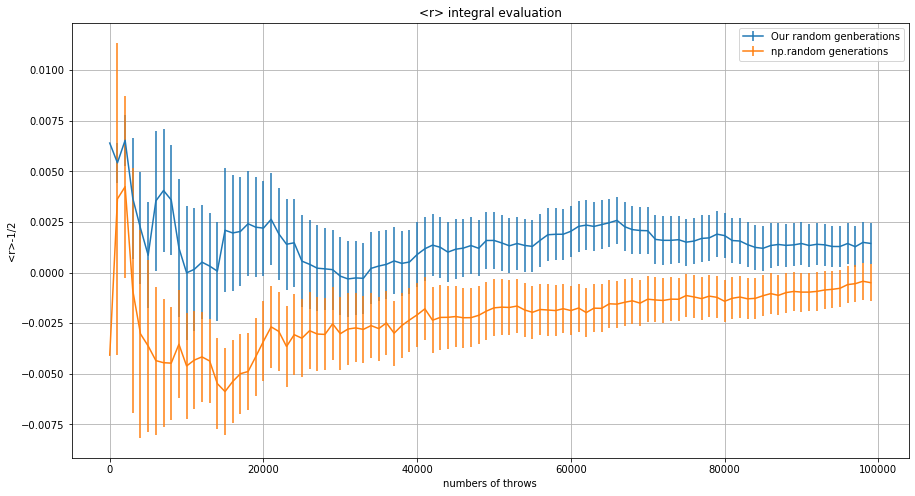

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import subprocess

CppPROGRAMS = '1'

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

plt.figure(figsize=(15, 8))
M=100000        #Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
subprocess.run([f"{CppPROGRAMS}/main", str(M)])
np.random.seed(0)
r = [np.loadtxt(f"{CppPROGRAMS}/dati.dat"), np.random.rand(M)]
x = np.arange(N)      # [0,1,2,...,N-1]
ave = [np.zeros(N), np.zeros(N)] 
av2 = [np.zeros(N), np.zeros(N)]
sum_prog = [np.zeros(N), np.zeros(N)]
su2_prog = [np.zeros(N), np.zeros(N)]
err_prog = [np.zeros(N), np.zeros(N)]

for i in range(N):
    sum = [0,0]
    for j in range(L):
        k = j+i*L
        sum[0] += r[0][k]
        sum[1] += r[1][k]
    ave[0][i] = sum[0]/L
    ave[1][i] = sum[1]/L 
    av2[0][i] = (ave[0][i])**2
    av2[1][i] = (ave[1][i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[0][i] += ave[0][j] # SUM_{j=0,i} r_j
        su2_prog[0][i] += av2[0][j] # SUM_{j=0,i} (r_j)^2
        sum_prog[1][i] += ave[1][j] # SUM_{j=0,i} r_j
        su2_prog[1][i] += av2[1][j] # SUM_{j=0,i} (r_j)^2
    sum_prog[0][i]/=(i+1) # Cumulative average
    su2_prog[0][i]/=(i+1) # Cumulative square average
    err_prog[0][i] = error(sum_prog[0],su2_prog[0],i) # Statistical uncertainty
    sum_prog[1][i]/=(i+1) # Cumulative average
    su2_prog[1][i]/=(i+1) # Cumulative square average
    err_prog[1][i] = error(sum_prog[1],su2_prog[1],i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,sum_prog[0]-0.5,yerr=err_prog[0], label="Our random genberations")
plt.errorbar(x,sum_prog[1]-0.5,yerr=err_prog[1], label="np.random generations")
plt.legend()
plt.title('<r> integral evaluation')
plt.xlabel('numbers of throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. 
As above we show the result for $\sigma^2 - \frac{1}{12}$ for $M = 10^5$ throws as a functions of the $10^2$ number of blocks and in the same plot the results with numpy random generator.

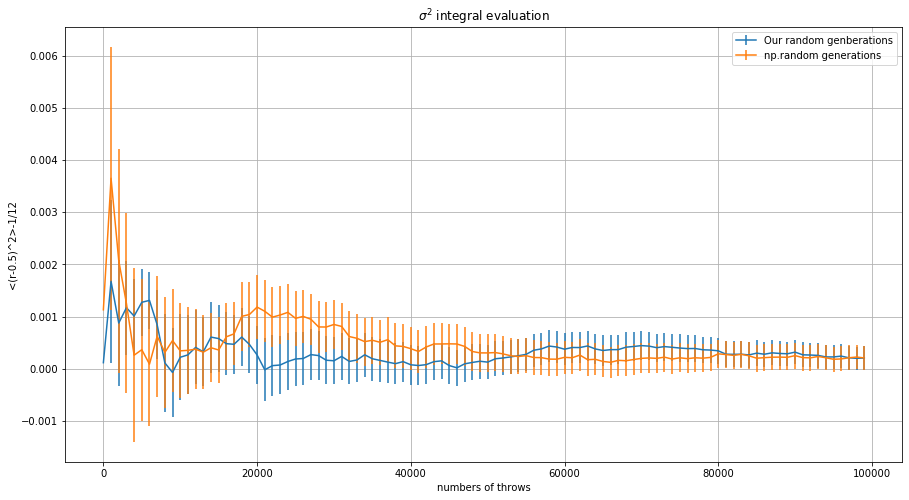

In [3]:
# Continue using variables and functions of the previous code cell
plt.figure(figsize=(15, 8))
ave = [np.zeros(N), np.zeros(N)] 
av2 = [np.zeros(N), np.zeros(N)]
sum_prog = [np.zeros(N), np.zeros(N)]
su2_prog = [np.zeros(N), np.zeros(N)]
err_prog = [np.zeros(N), np.zeros(N)]
for i in range(N):
    sum = [0,0]
    for j in range(L):
        k = j+i*L
        sum[0] += (r[0][k]-0.5)**2 # Accumulate measures
        sum[1] += (r[1][k]-0.5)**2
    ave[0][i] = sum[0]/L
    ave[1][i] = sum[1]/L 
    av2[0][i] = (ave[0][i])**2
    av2[1][i] = (ave[1][i])**2

for i in range(N):
    for j in range(i+1):
        sum_prog[0][i] += ave[0][j]
        sum_prog[1][i] += ave[1][j]
        su2_prog[0][i] += av2[0][j]
        su2_prog[1][i] += av2[1][j]
    sum_prog[0][i]/=(i+1) # Cumulative average
    su2_prog[0][i]/=(i+1) # Cumulative square average
    err_prog[0][i] = error(sum_prog[0],su2_prog[0],i) # Statistical uncertainty
    sum_prog[1][i]/=(i+1) # Cumulative average
    su2_prog[1][i]/=(i+1) # Cumulative square average
    err_prog[1][i] = error(sum_prog[1],su2_prog[1],i) # Statistical uncertainty
    
plt.errorbar(x,sum_prog[0]-1/12,yerr=err_prog[0],  label="Our random genberations")
plt.errorbar(x,sum_prog[1]-1/12,yerr=err_prog[1], label="np.random generations")
plt.legend()
plt.title(r'$\sigma^2$ integral evaluation')
plt.xlabel('numbers of throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution and use for $n$ $10^4$ pseudo-random numbers.

We show the results for a the $\chi^2$ using $10^4$ random numbers, the test result imply that the hypothesis of $n_i$ drawn from a uniform distribution is not true as showed by $\chi^2 \simeq 100$.

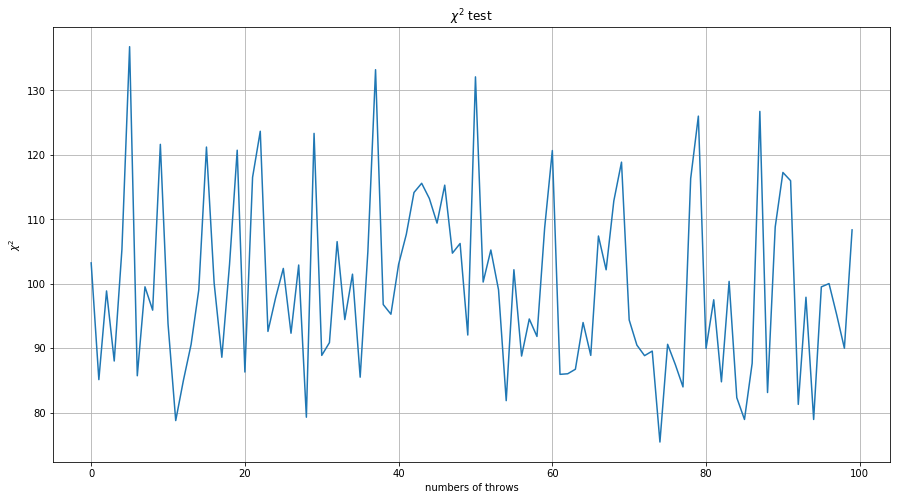

In [21]:
n=10000        
M=100  
plt.figure(figsize=(15, 8))
np.random.seed(0)
Chi_sq = np.zeros(M)
subprocess.run([f"{CppPROGRAMS}/main", str(M*n)])
vec_tot = np.loadtxt(f"{CppPROGRAMS}/dati.dat")

for i in range(M):
    n_i = np.zeros(M)
    vec = vec_tot[i*n:(i+1)*n]
    for j in range (M):
        for k in range(n):
            r0 = j/M
            r1 = 1/M + j/M
            if vec[k] < r1 and vec[k] > r0:
                n_i[j] += 1
    for t in range (M):            
        Chi_sq[i] += ((n_i[t] - n/M)**2)/(n/M)
plt.plot(Chi_sq)
plt.title(r'$\chi^2$ test')
plt.xlabel('numbers of throws')
plt.ylabel(r'$\chi^2$')
plt.grid(True)
plt.show()

## 01.2

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

We show the results below:

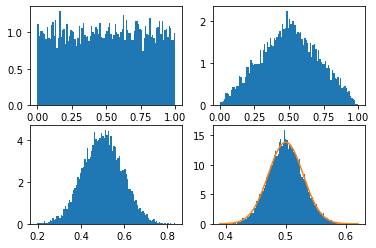

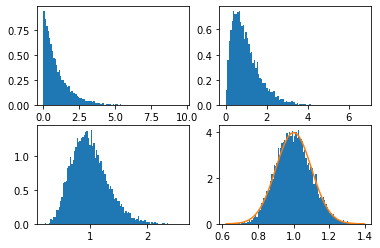

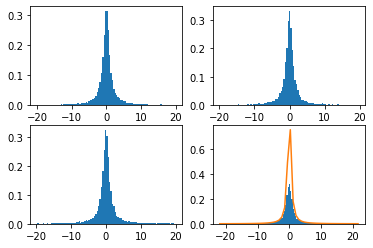

In [4]:
V = 10**4
M = 100
N = [1,2,10,100]
gauss = lambda x, mu, sigma_2: np.exp(-(x-mu)**2/(2*sigma_2))*(1/np.sqrt(2*np.pi*sigma_2)) 
vgauss = np.vectorize(gauss, excluded = (1,2))
cauchy = lambda x, gamma, mu: (gamma)/(np.pi*((x-mu)**2) + gamma**2)
vcauchy = np.vectorize(cauchy, excluded = (1,2))
subprocess.run([f"{CppPROGRAMS}/main", str(V*M)])
vec_tot = np.loadtxt(f"{CppPROGRAMS}/dati.dat")
plt.figure()
for i,n in enumerate(N):
    sn = np.mean(np.split(vec_tot[:n*V], V), axis=1)
    d = plt.subplot(2, 2, i+1)
    plt.hist(sn,bins = 100, density=True)
d_lim = d.get_xlim();
x = np.linspace(d_lim[0],d_lim[1])
plt.plot(x, vgauss(x,0.5,1/12/N[-1]));
subprocess.run([f"{CppPROGRAMS}/Exponential", str(V*M), str(1.)])
vec_tot = np.loadtxt(f"{CppPROGRAMS}/dati.dat")
plt.figure()
for i,n in enumerate(N):
    sn = np.mean(np.split(vec_tot[:n*V], V), axis=1)
    p = plt.subplot(2, 2, i+1)
    plt.hist(sn,bins = 100, density=True)
p_lim = p.get_xlim();
x = np.linspace(p_lim[0],p_lim[1])
plt.plot(x, vgauss(x,1,1/N[-1]));

subprocess.run([f"{CppPROGRAMS}/Lorentzian", str(V*M), str(1.)])
vec_tot = np.loadtxt(f"{CppPROGRAMS}/dati.dat")
plt.figure()
for i,n in enumerate(N):
    sn = np.mean(np.split(vec_tot[:n*V], V), axis=1)
    sn = sn[(sn>-20) & (sn<20)]
    t = plt.subplot(2, 2, i+1)
    plt.hist(sn,bins = 100, density=True)
t_lim = t.get_xlim();
x = np.linspace(t_lim[0],t_lim[1])
plt.plot(x, vcauchy(x,1,0));


## 01.3
- **Simulate** the Buffon’s experiment.

We show a picture of the $\pi$ result with block evaluation and blocks uncertanties, after $1*10^3$ steps the real value is within one $\sigma$.

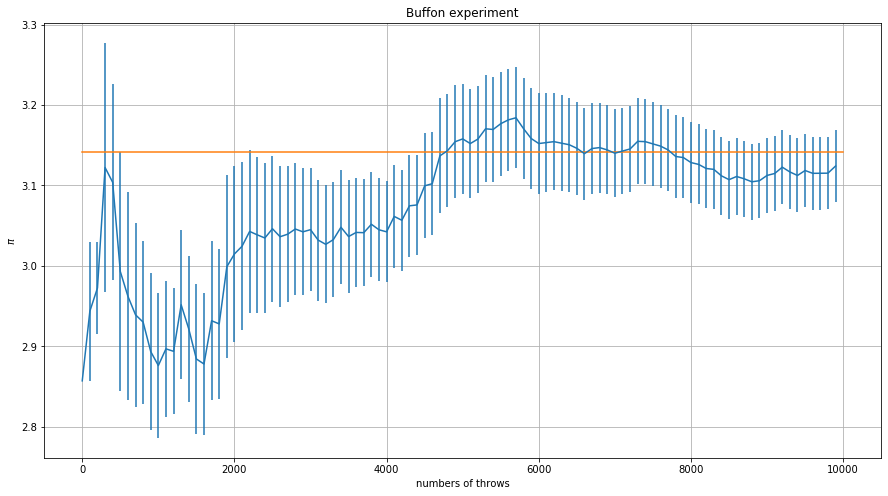

In [19]:
L = 1.5
d = 3.
N = 10000
nblocks = 100
plt.figure(figsize=(15, 8))
plt.title('Buffon experiment')
subprocess.run([f"{CppPROGRAMS}/1_3", str(N), str(nblocks)])
r, t = np.loadtxt(f"{CppPROGRAMS}/buffon.dat", unpack = True)
x = N/nblocks * np.arange(nblocks)
plt.errorbar(x,r,yerr = t)
plt.plot([0,N], [np.pi, np.pi])
plt.xlabel('numbers of throws')
plt.ylabel(r'$\pi$')
plt.grid(True)
plt.show()